# infinite features?

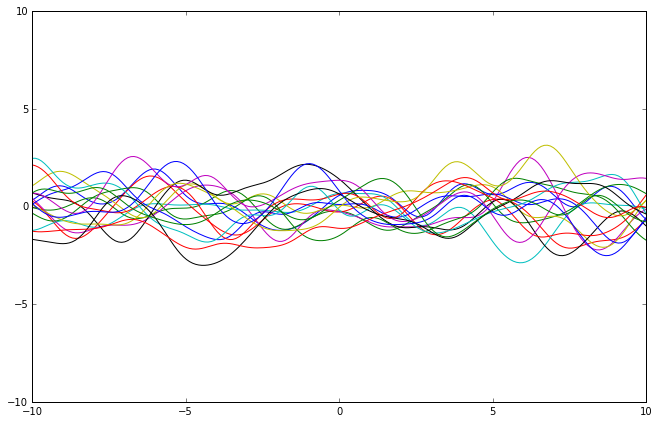

In [21]:
def rbf(a, b, c=1, l=1):
    a = np.expand_dims(a, 1)  # dims: (len(x), 1)
    b = np.expand_dims(b, 0)  # dims: (1, len(b))
    # a - b --> dims: (len(x), len(b))
    return np.exp(c * -.5 * ((a - b) / l)**2)


# mu_w : a vector with an infinite number of 0's
# cov_w : a square matrix with sides of infinite length

x = np.linspace(-10, 10, 200)

mu_lc = np.zeros_like(x)
cov_lc = rbf(x, x)

plt.figure(figsize=(11, 7))
plt.ylim(-10, 10)
plt.xlim(-10, 10)

for _ in range(17):
    lc = np.random.multivariate_normal(mu_lc, cov_lc)
    plt.plot(x, lc)

In [22]:
# analytical posterior, with kernels

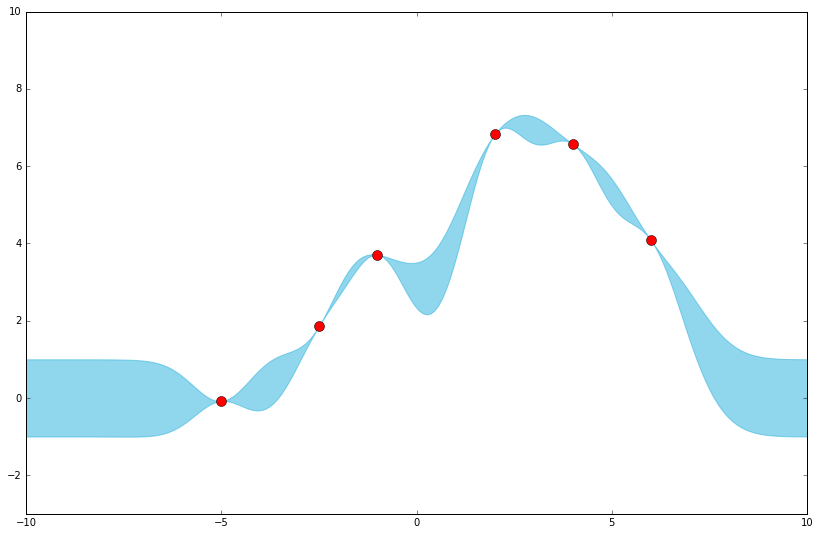

In [23]:
# Update prior over weights, then prior over function evals, with observed data
cov_obs = 0 * \
    np.eye(len(x_train))

A = rbf(x_test, x_train) @ np.linalg.inv(rbf(x_train, x_train) + cov_obs)
mu_y_post  = A @ y_train
cov_y_post = rbf(x_test, x_test) - A @ rbf(x_train, x_test)

# Plot
plot_gp_posterior(mu_y_post, cov_y_post, x_train, y_train, x_test)

# This whole covariance business

In [24]:
# D = 7
# N_OBS = 12

# mu_w = np.random.randn(D)

# 1. we can just make this ourselves:
#    - how does each of the 7 dimensions covary with every other dimension?
#    - for this reason, the thing will always be of size 7 x 7
# 2. we can estimate this from data
#    - numpy docs say: "m : array_like; A 1-D or 2-D array containing multiple variables 
#      and observations. Each row of m represents a variable, and each column a single 
#      observation of all those variables."
#    - this is backwards from what we typically think. nonetheless, our input to np.cov
#      should be of size (D, N_OBS)

# cov_w = np.cov(np.random.randn(D, N_OBS))

# N_OBS_X = 100

# mu_y = np.random.randn(N_OBS_X)  # after passing it through the mean function, which collapses the dimensionality D to 1
# phi_x = np.random.randn(D, N_OBS_X)  # same as above, with D first then N_OBS_X
# cov_y = phi_x.T @ cov_w @ phi_x  # 100 x 100; # we often just compute this directly with RBF kernel; this is the explicit way, which is of course infeasible if `phi` gives inf features!

# # now pluck out your things
# cov_w_y = cov_w @ phi_x  # (7 x 7) @ (7, 100) --> 7, 100
# cov_y_x = phi_x.T @ cov_w  # (100 x 7) @ (7, 7) --> 100, 7

"Centering the process on a linear model, while allowing the process to accommodate deviations from the lienar model, addresses the curse of dimensionality, as the psoterior can concentrate close to the linear moel (or an alternative parametric mean function) to an extent supported by the data"

BDA3, Chapter 21

# $P(y^{*}\vert y)$

(just multiply phi(x_new) through the mean, and wrapped around the covariance)